In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn import decomposition, ensemble
import pandas as pd
import numpy as np
from PIL import Image
import numpy, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

ModuleNotFoundError: No module named 'sklearn'

#opening dataset

In [151]:
trainDF=pd.read_csv('intent1-corrected.csv',names=['Text','Intent'],encoding="utf-8")
trainDF.sample(frac=1).reset_index(drop=True)
print(trainDF.shape)
trainDF.head()

(10561, 2)


,Text,Intent
0,Kiyyoo dirama oso eguti jirun na darbe tari a...,Question
1,Meeti ree kuta 28ffaa,Question
2,Kutaa digdami sadetaffa isiin egee dadhabee.,Negative
3,Kutaa digdami sadetaffaa fiidagaa maali nuuraa...,Negative
4,Nuuf jabbadhakaa warii Akka kotti kiyyoo jaala...,Positive


In [152]:
y = trainDF['Intent']

In [153]:
y

0        Question 
1        Question 
2         Negative
3         Negative
4         Positive
           ...    
10556     Negative
10557     Negative
10558     Positive
10559     Negative
10560    Question 
Name: Intent, Length: 10561, dtype: object

In [154]:
trainDF.head()
clas=trainDF.Intent.value_counts()
print (clas)

Positive       4320
Negative       3271
Suggestion     1686
Question        736
Wish            546
Name: Intent, dtype: int64


In [155]:
import re
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = sen.lower()
    sentence = re.sub(r'\s+', ' ', sentence)
    sentence = re.sub(r'wo*w','wow', sentence)
    sentence = re.sub(r'uuuu*f','uff', sentence)
    sentence = re.sub(r'dduu*u','bareedduu',sentence)
    return sentence
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

In [156]:
mydata = []
sentence = list(trainDF['Text'])
for sen in sentence:
    mydata.append(preprocess_text(str(sen)))

In [157]:
X = preprocess_text(str(mydata))

In [158]:
t=['ajjeesa','ajeechaa','ajjeestuu','ajjeechaan','ajjeechaatu','ajjeefamaa','ajjeefamuu',
   'ajjeesuuf','ajjeesti','ajjeestuudha']
d=['dararama','dararamuu','dararuu','dara','dararamu','daraaramu','dararama','dararamaa','dararsuu','daraa']
a=['abdachiisu','abdachuu','abdannee','abdatamu','abdiisu']
a2=['abaaraa','abaarame','abaaramtuu']
a3=['abba','abbaama','abbako','abbooti','abbo']
a4=['aanota','aanaafi','aanaalee','aanaarrattuu']
ag=['agarsiifnee','agarsiiftee','agarsiisuu','agarsiisaa','agarsiisee','agarsiisuu','agarsiisuu','agarsiisuu',
 'agarsistanii','argisiifna','argisiiftuu','argisiisi','argisiisuukeetii']
aj=['ajaahibsiifta','ajaahibsiisaa','ajaahibuma','ajaayiba','ajab','ajahiba','ajahibsiisuu']
aj2=['ajajaa','ajajamaa','ajajjee']
aj3=['ajjecha','ajjeechaa','ajjeechaa','ajjeechaa','ajjeesuu','ajjeefamaas','ajjeesuu',
 'ajjeesaa','ajjeessuu','ajjeessuu','ajjees','ajjeesuu','ajjeesuu','ajjesisaa']
am=['amanamta','amaniinaa','amantaa','amantaas','amantanii','aman','aman','amanuu']
ar=['argachudhuma','argachuu','argachuu','argachuuti']
ar1=['arganii','arganuu','argannee','argatani']
ar2=['argatanii','argataniiruu','argate','arg','argatta','argattanii','argatte','arge','argii','argina',
 'argiuu','arginees']
ar3=['argama','argame','argamsiifne','argamsiisuu','argamu','argamuu']
ar4=['ariita', 'ariiyatamni', 'ariyaa', 'ariyamaa','ariyanii','arihattani','arihe']
ar5=['arrabsamuu','arrabsanii','arrabsoo','arrabsuufi']
aw=['awwaalam','awwaalu','awwaaluu','awwallannaa']
ay=['ayyaanasaa','ayyaaneffattuu','ayyaanni','ayyaannii']
bl=['balleessaa','balleessuu','balleessee','balleessii','balleessinaa','balleessite','balleessuu','balleessuu',
 'balleessuu','balleessuu']
bl1=['barbaachisuu','barbaachisaa','barbaachisuu','barbaachisere','barbaachisuu','barbaachisuu']
bl2=['barbaadu','barbaaduu','barbaaduu','barbaaduu']
bl3=['barbaanuu','barbaannu','barbaada','barbaadaa','barbauu','barbaaddanii','barbaaddi','barbaaddu',
 'barbaadnu']
bl4=['beela','beelaa','beelaafi','beelaa','beelahaa','beelahe','beelayee','beeljigee','beelli']
bl5=['bilisomsitani', 'bilisomte', 'bilisoomuu','bilisoomnnee','bilisoomsaa','bilisoomsee','bilisoomsuu',
 'bilisoomsinaa']
bl6=['bilisummaa','bilisummaa','bilisummaanuu']
by=['baayya','baye','bayyee','baayyata','baayyate','baayya','baayye','baayyee','baayyee','baayyifte','baayyina']
br=['bareechinu','bereedaa','bareeda','bareedaa','bareeduu','bareeddu','bareedduuuuuuuuuuuuu','barreennuu']
bro=['barnootaa','barnota']
bs=['basaasaa','basasuu']
bk=['beekna','beeknaa','beekuu','beeknu','beektaa','beekta','beektani','beektanii','beektanii','beektanu',
 'beekte','beektuu','beektota','beek','beeku','bekatani','bekna','bekta','bektuu']
bt=['bitamani','bitamtuu','bitatte','bitamtoota']
bn=['boonsuu','boonsaa','boonsuu','boonsuu','boonsu','boonsuu']
bns=['boonna','boonuu','boona']
cms=['cimsaa','cimsee','cimsi','cimsite','cimsuu','cimsuu','cimsuu']
cm=['cimu','cimuu','cimaa','cimaafi','cimee']
cmn=['cimina','cimnee']
dg=['dorgomuu','dorgomu']
dh=['dhuunfaatii','dhuunfakee','dhuunffatte']
rk=['rakkaacha', 'rakkachaa', 'rakkachuu', 'rakkataa', 'rakkatti', 'rakkattu','rakko', 
    'rakkollee', 'rakkoo', 'rakkoolee', 'rakkoon']
rko=['rakko','rakkollee', 'rakkoo', 'rakkoolee', 'rakkoon']
rks=['rakkisa', 'rakkisaa', 'rakkisadha', 'rakkise', 'rakkisneen', 'rakkisti','rakisaa']
sm=['saamaahoo', 'saamahoo', 'saamamuu', 'saamicha', 
    'saamii', 'saammachaa', 'saammadhaa', 'saamsisaa', 'saamtanii', 'saamtuuf']
wy=['wayyaanee', 'wayyaaneedha', 'wayyaaneen', 'wayyaaneetti','wayyaannee', 'wayyaanummaan', 'wayyanee']
uf=['uuuf', 'uuufff', 'uuuuuuffff', 'uuuuuuuuuuff', 'uuuuuuuuuuufff', 'uuuuuuuuuuuuuuuuffff']
wj=['wajjiin', 'wajjin', 'wajjiniin','waajjiin']
def stemming(sen):
    if sen.endswith('se'):
        sen=sen[:-1]+'uu'
    if sen.endswith('sa'):
        sen=sen[:-1]+'uu'
    if sen.endswith('su'):
        sen=sen[:-1]+'uu'
    if sen.endswith('saniiru'):
        sen=sen[:-6]+'uu'
    if sen.endswith('siteetti'):
        sen=sen[:-7]+'uu'
    if sen.endswith('seera'):
        sen=sen[:-4]+'uu'
    if sen.endswith('qqaatota'):
        sen = sen[:-4]+'suu'
    if sen.endswith('qqahuu'):
        sen = sen[:-3]+'asuu'
    if sen.endswith("qqaasanii"):
        sen = sen[:-4]+'uu'
    if sen.endswith('qqaatonni'):
        sen = sen[:-5]+'suu'
    if sen.endswith('qqahe'):
        sen = sen[:-2]+'asuu'
    if sen.endswith('een'):
        sen = sen[:-1]
    if sen.endswith('eesisu')or sen.endswith('eesisa'):
        sen= sen[:-1]+'uu'
    if sen.endswith('altudha'):
        sen = sen[:-3]+'u'
    if sen.endswith('dani'):
        sen=sen[:-4]+'uu'
    if sen.endswith('ne'):
        sen=sen[:-2]+'uu'
    if sen.endswith('bistanii'):
        sen=sen[:-5]+'uu'
    if sen.endswith('bihuu'):
        sen=sen[:-5]+'suu'
    if sen.endswith('bistu'):
        sen=sen[:-2]+'uu'
    if sen.endswith('bistanis'):
        sen=sen[:4]+'uu'
    if sen.endswith('uuf') or sen.endswith('n'):
        sen=sen[:-1]
    if sen.endswith('atti') or sen.endswith('tti') or sen.endswith('tii'):
        sen=sen[:-3]
    if sen.endswith('aadha'):
        sen=sen[:-3]
    if sen.endswith('f'):
        sen=sen[:-1]
    if sen.endswith('saanii'):
        sen=sen[:-7]+'a'
    if sen.endswith('ati'):
        sen=sen[:-3]
    if sen.endswith('icha'):
        sen=sen[:-4]+'a'
    if sen.endswith('wwan'):
        sen=sen[:-4]
    if sen.endswith('wwa'):
        sen=sen[:-4]
    if sen.endswith('chiisuu'):
        sen=sen[:5]+'uu'
    if sen.endswith('chiisaadha'):
        sen=sen[:-8]+'uu'
    if sen.endswith('ddan'):
        sen = sen[:-4]+'uu'
    if sen.endswith('chiisaa'):
        sen=sen[:-8]+'uu'
    if sen.endswith('dda'):
        sen = sen[:-4]+'uu'
    if sen.endswith('oomaa'):
        sen=sen[:-5]+'a'
    if sen.endswith('oomi'):
        sen=sen[:-4]+'a'
    if sen.endswith('dha'):
        sen=sen[:-3]
    if sen.endswith('dhaa'):
        sen=sen[:-4]
    if sen.endswith('uddoo'):
        sen=sen[:-2]+'aa'
    if sen.endswith('uddina'):
        sen=sen[:-3]+'aa'
    if sen.endswith("idhamaa"):
        sen=sen[:-3]+'a'
    if sen.endswith("idhamaas"):
        sen=sen[:-4]+'a'
    if sen.endswith('idhamuu'):
        sen=sen[:-3]+'a'
    if sen.endswith("otota") or sen.endswith("otuma"):
        sen=sen[:-3]+'a'
    if sen.endswith('otummaa'):
        sen=sen[:-4]+'a'
    if sen.endswith('oota'):
        sen=sen[:-4]+'uu'
    if sen.endswith('ttoonni'):
        sen=sen[:-5]+'uu'
    if sen.endswith('tu'):
        sen=sen[:-2]
    if sen.endswith('oggansuu'):
        sen=sen[:2]+'a'
    if sen.endswith('oggansi'):
        sen=sen[:-1]+'a'
    if sen.endswith('oggantuu'):
        sen=sen[:-3]+'sa'
    if sen.endswith('oggantoonni'):
        sen=sen[:6]+'sa'
    if sen.endswith('ogganta') or sen.endswith('ogganaa'):
        sen=sen[:-2]+'sa'
        #sen=sen[:-3]+'sa'
    if sen.endswith('jjettota') or sen.endswith('jjattuu') or sen.endswith('jjattota'):
        sen=sen[:-3]+'aa'
    if sen.endswith('jjetamuu') or sen.endswith('jjatamuu'):
        sen=sen[:-4]+'aa'
    if sen.endswith('jjate')or sen.endswith('jjete'):
        sen=sen[:-2]+"chuu"
    if sen.endswith("shtummaa"):
        sen=sen[:-6]+'a'
    if sen.endswith('shaa'):
        sen=sen[:-1]
    if sen.endswith("jijjiirame"):
        sen=sen[:-1]+'a'
    if sen.endswith("jijjiiramni"):
        sen=sen[:-2]+'a'
    if sen.endswith("jijjiiramaa"):
        sen=sen[:-1]
    if sen.endswith('deessuu') or sen.endswith('deenyuu') or sen.endswith('deenyaa'):
        sen=sen[:-4]
    if sen.endswith('deetta')or sen.endswith("deessa") or sen.endswith('deenya') or sen.endswith('deenye'):
        sen=sen[:-3]
    if sen in t:
        sen=("ajjeesuu")
    if sen in d:
        sen=("dararaa")
    if sen in a:
        sen=('abdachuu')
    if sen in a2:
        sen=('abaarsa')
    if sen in a3:
        sen=("abbaa")
    if sen in a4:
        sen=("aanaa")
    if sen.endswith("rra"):
        sen=sen[:-3]
    if sen.endswith('sitanii') or sen.endswith('sitanuu'):
        sen=sen[:-6]+'uu'
    if sen.endswith('samaa'):
        sen = sen[:-4]+'uu'
    if sen.endswith('uuufaa'):
        sen=sen[:-4]+'ftuu'
    if sen in ag:
        sen=("agarsiisuu")
    if sen in aj:
        sen=('ajaahiba')
    if sen.endswith('amamee'):
        sen =sen[:-4]+'uu'
    if sen in aj2:
        sen=("ajaja")
    if sen.endswith('lee'):
        sen=sen[:-3]
    #if sen.endswith('m')
    if sen in aj3:
        sen=("ajjeechaa")
    if sen in am:
        sen=('amanamt')
    if sen.endswith('rraa'):
        sen=sen[:-4]
    if sen in ar:
        sen=('argachuu')
    if sen in ar1:
        sen=('argan')
    if sen in ar2:
        sen=('argat')
    if sen in ag:
        sen=('argarsiisuu')
    if sen in ar4:
        sen="ariyatama"
    if sen.endswith('ti'):
        sen=sen[:-2]
    if sen in ar5:
        sen='arrabsoo'
    if sen in aw:
        sen="awwaala"
    if sen in ay:
        sen=('ayyaana')
    if sen.endswith('tni'):
        sen=sen[:-2]+'a'
    if sen.endswith('nni'):
        sen=sen[:-3]+'ta'
    if sen.endswith('ita'):
        sen=sen[:-3]+'uu'
    if sen.endswith('ssan'):
        sen=sen[:-2]+'uu'
    if sen.endswith('sanii'):
        sen=sen[:-4]+'uu'
    if sen in bl:
        sen='balleessaa'
    if sen.endswith('ru'):
        sen=sen[:-2]
    if sen.endswith('attanii'):
        sen=sen[:-6]+'chuu'
    if sen.endswith("tootaa"):
        sen=sen[:-6]+'aa'
    if sen.endswith('tee'):
        sen=sen[:-1]
    if sen in bl1:
        sen='barbaach'
    if sen in bl2:
        sen='barbaad'
    if sen in bl3:
        sen='barbaadn'
    if sen in bl4:
        sen='beela'
    if sen in bl5:
        sen='bilisoom'
    if sen in bl6:
        sen='bilisum'
    if sen in by:
        sen='baayyee'
    if sen.endswith('raaruu')or sen.endswith('raaree'):
        sen=sen[:-2]
    if sen in br:
        sen='bareeda'
    if sen in bro:
        sen='barnoota'
    if sen in bs:
        sen='basaasuu'
    if sen in bk:
        sen='beek'
    if sen.endswith('lchaate'):
        sen=sen[:-4]+'ina'
    if sen.endswith('lchaataa'):
        sen=sen[:-5]+'ina'
    if sen in bt:
        sen='bitamt'
    if sen in bn:
        sen='boons'
    if  sen in bns:
        sen='boon'
    if sen.endswith('dhamo'):
        sen=sen[:-5]
    if sen in cms:
        sen='cims'
    if sen in cm:
        sen='cim'
    if sen in cmn:
        sen='cimn'
    if sen.endswith('siifne')or sen.endswith("siisuu"):
        sen=sen[:-6]
    if sen.endswith('gamuu'):
        sen=sen[:-1]
    if sen in rk:
        sen='rakka'
    if sen in rko:
        sen='rakkoo'
    if sen in rks:
        sen='rakkis'
    if sen in sm:
        sen='saam'
    if sen in wy:
        sen='wayyaanee'
    if sen in uf:
        sen='uff'
    if sen in wj:
        sen='wajjii'
    if sen in dg:
        sen='dorgommii'
    return sen

In [159]:
from imblearn.over_sampling import SMOTE
# split the dataset into training and validation datasets 
X =  trainDF['Text']
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)
#y_test = encoder.fit_transform(y_test)

In [160]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1, random_state=0)

In [161]:
ros = SMOTE(random_state=100)
X_train_ros, y_train_ros = ros.fit_resample(x, y)

ValueError: could not convert string to float: 'Kiyyoo dirama oso  eguti jirun na darbe tari ayaana moo sababa godhatu moyuu'

In [109]:
# word level tf-idf
sm = SMOTE()
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}',ngram_range=(1,1), max_features=3000)
tfidf_vect.fit(X)
xtrain_tfidf =  tfidf_vect.transform(x_train)
xvalid_tfidf =  tfidf_vect.transform(x_test)
#xtrain_tfidfs, train_ys = sm.fit_resample(xtrain_tfidf, y_train)
#train_ys = sm.fit_sample()
# ngram level tf-idf 
#unigram and bigraam
tfidf_vect_unbgram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=5000)
tfidf_vect_unbgram.fit(X)
xtrain_tfidf_unbgram =  tfidf_vect_unbgram.transform(x_train)
xvalid_tfidf_unbgram =  tfidf_vect_unbgram.transform(x_test)
#unigram and trigram
tfidf_vect_untgram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=6000)
tfidf_vect_untgram.fit(X)
xtrain_tfidf_untgram =  tfidf_vect_untgram.transform(x_train)
xvalid_tfidf_untgram =  tfidf_vect_untgram.transform(x_test)
#bigram
tfidf_vect_bigram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,2), max_features=5000)
tfidf_vect_bigram.fit(X)
xtrain_tfidf_bigram =  tfidf_vect_bigram.transform(x_train)
xvalid_tfidf_bigram =  tfidf_vect_bigram.transform(x_test)

#bigram and trigram
tfidf_vect_btgram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_btgram.fit(X)
xtrain_tfidf_btgram =  tfidf_vect_btgram.transform(x_train)
xvalid_tfidf_btgram =  tfidf_vect_btgram.transform(x_test)
#trigram
tfidf_vect_trigram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(3,3), max_features=5000)
tfidf_vect_trigram.fit(X)
xtrain_tfidf_trigram =  tfidf_vect_trigram.transform(x_train)
xvalid_tfidf_trigram =  tfidf_vect_trigram.transform(x_test)
#fourgram
tfidf_vect_fourgram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,5), max_features=5000)
tfidf_vect_fourgram.fit(X)
xtrain_tfidf_fourgram =  tfidf_vect_fourgram.transform(x_train)
xvalid_tfidf_fourgram =  tfidf_vect_fourgram.transform(x_test)
# characters level tf-idf
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(3,15), max_features=5000)
tfidf_vect_ngram_chars.fit(X)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(x_train) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:546: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [110]:
#vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
tfidf_vect_trigram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(3,3), max_features=5000)
tfidf_vect_trigram.fit(X)
features = (tfidf_vect_trigram.get_feature_names()) 
X1 =  tfidf_vect_trigram.transform(x_train)
print("\n\nFeatures : \n", features) 
print("\n\nX1 : \n", X1.toarray()) 
X2 = xvalid_tfidf_trigram 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores)   
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", words.head(7))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




Features : 
 ['100 fidi jedhamen', '100ffaa kabajaa jira', '1500 keessa ummanni', '16ffaa fi 17ffaa', '17ffaa keessa ture', '18 irraa eegala', '2012tti guddinni kun', '5 ta a', '6 5 ta', '7 tti gadi', 'a buddeena koo', 'a dubbiin warra', 'a jedhamee tilmaamama', 'a lama teenyee', 'a ta a', 'a yoo dhufe', 'aa bira akka', 'aa bor isa', 'aa buusuu danda', 'aa gaarii argataa', 'aa hin qabu', 'aa karaa malee', 'aa namni jal', 'aa qabdi iji', 'aa ta uu', 'aadaa ummata biyyattii', 'aadaa ummata itoophiyaati', 'aadaafi amantaa eeggateen', 'aan argatu keessa', 'aanaa baankichaa gufuulee', 'aanaa kuyyuu rasaasaan', 'aanaa kuyyuutti aannan', 'aanaatti xiyyeeffannoo kennun', 'aango qabeessa irra', 'aangoo harka isaa', 'aannaan qonnaan bulaa', 'aannan bishaan itti', 'aannan godinichatti omishamu', 'aannan lafatti dhangalaasuu', 'aannan lagatti dhangalaasan', 'aannan lagatti gadi', 'aannan liitira tokko', 'aannan qulqulina hin', 'aannan qulqulinasaa hin', 'aannan waan gurguraniif', 'aannanii irrat

In [124]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    return metrics.accuracy_score(predictions, y_test)

In [125]:
def train_modelf(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    return metrics.f1_score(predictions, y_test, average='micro')

In [130]:
def train_modelc(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    return metrics.confusion_matrix(predictions, y_test)

In [134]:
def train_modelr(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    return metrics.classification_report(predictions, y_test)

In [135]:
def train_modelrecall(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    return metrics.recall_score(predictions, y_test, average='micro')

testin the accuracy of unigram

In [136]:
# Naive Bayes on Word Level TF IDF Vectors
model = naive_bayes.MultinomialNB()
accuracy_of_unigram = train_model(model, xtrain_tfidf, y_train, xvalid_tfidf)
f1_score= train_modelf(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xvalid_tfidf)
recalls = train_modelrecall(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xvalid_tfidf)
confusion_matrix = train_modelc(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xvalid_tfidf)
claasification_report = train_modelr(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xvalid_tfidf)
print ("accuracy of unigram approach: ", accuracy_of_unigram)
print("F1 score, unigram approach ", f1_score)
print("recall")
print(train_modelrecall)
print("---------------------------------------------------------------")
print("report")
print(claasification_report)
# Naive Bayes on Ngram Level TF IDF Vectors
#accuracy2 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
#print ("NB, N-Gram Vectors: ", accuracy2)
# Naive Bayes on Character Level TF IDF Vectors
#accuracy3 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
#print ("NB, CharLevel Vectors: ", accuracy3)
print("----------------------------------------------------------------")
print("confusion matrix ")
print(confusion_matrix)

accuracy of unigram approach:  0.7398297067171239
F1 score, unigram approach  0.7398297067171238
recall
<function train_modelrecall at 0x000001545C2A9A60>
---------------------------------------------------------------
report
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       378
           1       0.84      0.71      0.77       511
           2       0.50      0.85      0.63        48
           3       0.52      0.74      0.61       104
           4       0.22      0.69      0.33        16
           5       0.00      0.00      0.00         0

    accuracy                           0.74      1057
   macro avg       0.49      0.63      0.53      1057
weighted avg       0.78      0.74      0.75      1057

----------------------------------------------------------------
confusion matrix 
[[292  50  17  11   8   0]
 [ 51 361  20  56  22   1]
 [  1   5  41   1   0   0]
 [  2  12   4  77   9   0]
 [  2   1   0   2  11   0]
 [  0   0   0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#testing the accuracy of unigram and bigram

In [137]:
accuracy_of_unigram_and_bigram = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_unbgram, y_train, xvalid_tfidf_unbgram)
f1_score= train_modelf(naive_bayes.MultinomialNB(), xtrain_tfidf_unbgram, y_train, xvalid_tfidf_unbgram)
confusion_matrix = train_modelc(naive_bayes.MultinomialNB(), xtrain_tfidf_unbgram, y_train, xvalid_tfidf_unbgram)
print ("accuracy unigram and bigrm: ", accuracy_of_unigram_and_bigram)
print("F1 score, unigram and bigrm: ", f1_score)
claasification_report = train_modelr(naive_bayes.MultinomialNB(), xtrain_tfidf_unbgram, y_train, xvalid_tfidf_unbgram)
print("---------------------------------------------------------------")
print("report ")
print(claasification_report)
print("---------------------------------------------------------------")
print("confusion matrix ")
print(confusion_matrix)
print("---------------------------------------------------------------")

accuracy unigram and bigrm:  0.7578051087984863
F1 score, unigram and bigrm:  0.7578051087984863
---------------------------------------------------------------
report 
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       374
           1       0.88      0.71      0.79       526
           2       0.50      0.98      0.66        42
           3       0.52      0.77      0.62       100
           4       0.24      0.80      0.37        15
           5       0.00      0.00      0.00         0

    accuracy                           0.76      1057
   macro avg       0.50      0.67      0.54      1057
weighted avg       0.81      0.76      0.77      1057

---------------------------------------------------------------
confusion matrix 
[[295  41  16  14   8   0]
 [ 49 376  23  56  21   1]
 [  1   0  41   0   0   0]
 [  1  11   2  77   9   0]
 [  2   1   0   0  12   0]
 [  0   0   0   0   0   0]]
-------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
accuracy_of_unigram_and_trigram = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_untgram, y_train, xvalid_tfidf_untgram)
print ("accuracy of unigram and trigram: ", accuracy_of_unigram_and_trigram)
f1_scoren= train_modelf(naive_bayes.MultinomialNB(), xtrain_tfidf_untgram, y_train, xvalid_tfidf_untgram)
confusion_matrixn = train_modelc(naive_bayes.MultinomialNB(), xtrain_tfidf_untgram, y_train, xvalid_tfidf_untgram)
claasification_report = train_modelr(naive_bayes.MultinomialNB(), xtrain_tfidf_untgram, y_train, xvalid_tfidf_untgram)
print("F1 score, unigram and tri-gram: ", f1_scoren)
print("---------------------------------------------------------------")
print("report ", claasification_report)
print("---------------------------------------------------------------")
print("confusion matrix ")
print(confusion_matrixn)

accuracy of unigram and trigram:  0.7568590350047304
F1 score, unigram and tri-gram:  0.7568590350047304
---------------------------------------------------------------
report                precision    recall  f1-score   support

           0       0.84      0.80      0.82       367
           1       0.88      0.71      0.79       535
           2       0.49      1.00      0.66        40
           3       0.52      0.78      0.62        97
           4       0.26      0.72      0.38        18
           5       0.00      0.00      0.00         0

    accuracy                           0.76      1057
   macro avg       0.50      0.67      0.54      1057
weighted avg       0.81      0.76      0.77      1057

---------------------------------------------------------------
confusion matrix 
[[292  39  16  12   8   0]
 [ 52 379  24  57  22   1]
 [  0   0  40   0   0   0]
 [  2  10   2  76   7   0]
 [  2   1   0   2  13   0]
 [  0   0   0   0   0   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
#accuracy2 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
accuracy_of_bigram = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_bigram, y_train, xvalid_tfidf_bigram)
print ("accurcy of Bigram approach ", accuracy_of_bigram)
f1_scoren= train_modelf(naive_bayes.MultinomialNB(), xtrain_tfidf_bigram, y_train, xvalid_tfidf_bigram)
confusion_matrixn = train_modelc(naive_bayes.MultinomialNB(), xtrain_tfidf_bigram, y_train, xvalid_tfidf_bigram)
claasification_report = train_modelr(naive_bayes.MultinomialNB(), xtrain_tfidf_bigram, y_train, xvalid_tfidf_bigram)
print("F1 score, bigram: ", f1_scoren)
print("---------------------------------------------------------------")
print("report ", claasification_report)
print("---------------------------------------------------------------")
print("confusion matrix ")
print(confusion_matrixn)

accurcy of Bigram approach  0.7161778618732261
F1 score, bigram:  0.7161778618732261
---------------------------------------------------------------
report                precision    recall  f1-score   support

           0       0.78      0.84      0.81       324
           1       0.89      0.64      0.74       595
           2       0.20      0.94      0.32        17
           3       0.54      0.75      0.62       106
           4       0.22      0.73      0.34        15
           5       0.00      0.00      0.00         0

    accuracy                           0.72      1057
   macro avg       0.44      0.65      0.47      1057
weighted avg       0.80      0.72      0.74      1057

---------------------------------------------------------------
confusion matrix 
[[271  30  10   7   6   0]
 [ 73 380  54  61  26   1]
 [  1   0  16   0   0   0]
 [  1  17   2  79   7   0]
 [  2   2   0   0  11   0]
 [  0   0   0   0   0   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
#accuracy2 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
accuracy_of_bigram_and_trigram = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_btgram, y_train, xvalid_tfidf_btgram)
print ("accuracy of bigram and trigram: ", accuracy_of_bigram_and_trigram)
f1_scoren= train_modelf(naive_bayes.MultinomialNB(), xtrain_tfidf_btgram, y_train, xvalid_tfidf_btgram)
confusion_matrixn = train_modelc(naive_bayes.MultinomialNB(), xtrain_tfidf_btgram, y_train, xvalid_tfidf_btgram)
claasification_report = train_modelr(naive_bayes.MultinomialNB(), xtrain_tfidf_btgram, y_train, xvalid_tfidf_btgram)
print("F1 score, bigram and trigram: ", f1_scoren)
print("---------------------------------------------------------------")
print("report ")
print(claasification_report)
print("---------------------------------------------------------------")
print("confusion matrix ")
print(confusion_matrixn)

accuracy of bigram and trigram:  0.67360454115421
F1 score, bigram and trigram:  0.67360454115421
---------------------------------------------------------------
report 
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       299
           1       0.88      0.60      0.71       633
           2       0.13      0.92      0.23        12
           3       0.46      0.72      0.56        95
           4       0.24      0.67      0.35        18
           5       0.00      0.00      0.00         0

    accuracy                           0.67      1057
   macro avg       0.40      0.62      0.44      1057
weighted avg       0.77      0.67      0.70      1057

---------------------------------------------------------------
confusion matrix 
[[244  31  11   6   7   0]
 [101 377  57  73  24   1]
 [  1   0  11   0   0   0]
 [  0  17   3  68   7   0]
 [  2   4   0   0  12   0]
 [  0   0   0   0   0   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
#accuracy2 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
accuracy_of_trigram = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_trigram, y_train, xvalid_tfidf_trigram)
print ("accuracy of trigrams: ", accuracy_of_trigram)
f1_scoren= train_modelf(naive_bayes.MultinomialNB(), xtrain_tfidf_trigram, y_train, xvalid_tfidf_trigram)
confusion_matrixn = train_modelc(naive_bayes.MultinomialNB(), xtrain_tfidf_trigram, y_train, xvalid_tfidf_trigram)
claasification_report = train_modelr(naive_bayes.MultinomialNB(), xtrain_tfidf_trigram, y_train, xvalid_tfidf_trigram)
print("F1 score, trigram: ", f1_scoren)
print("---------------------------------------------------------------")
print("report ") 
print(claasification_report)
print("---------------------------------------------------------------")
print("confusion matrix ") 
print(confusion_matrixn) 

accuracy of trigrams:  0.7341532639545885
F1 score, trigram:  0.7341532639545884
---------------------------------------------------------------
report 
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       278
           1       0.94      0.63      0.75       641
           2       0.15      0.92      0.25        13
           3       0.59      0.82      0.69       106
           4       0.28      0.74      0.41        19
           5       0.00      0.00      0.00         0

    accuracy                           0.73      1057
   macro avg       0.45      0.67      0.49      1057
weighted avg       0.83      0.73      0.75      1057

---------------------------------------------------------------
confusion matrix 
[[261  10   4   1   2   0]
 [ 84 402  66  58  30   1]
 [  1   0  12   0   0   0]
 [  0  15   0  87   4   0]
 [  2   2   0   1  14   0]
 [  0   0   0   0   0   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


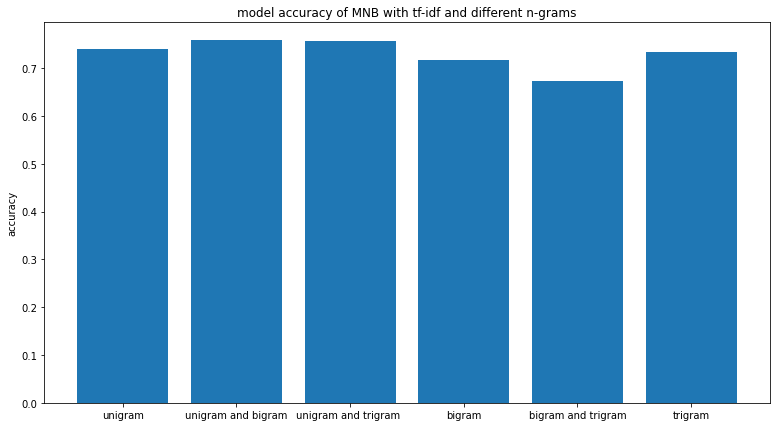

In [142]:
import matplotlib.pyplot as plt
names = ['unigram','unigram and bigram', 'unigram and trigram ', 'bigram', 'bigram and trigram', 'trigram']
values = [accuracy_of_unigram, accuracy_of_unigram_and_bigram, accuracy_of_unigram_and_trigram, accuracy_of_bigram, accuracy_of_bigram_and_trigram, accuracy_of_trigram]
plt.figure(figsize=(13, 7))
plt.bar(names, values)
plt.title('model accuracy of MNB with tf-idf and different n-grams')
plt.ylabel('accuracy')
plt.show()

In [143]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    print(predictions)
    [print (X[i], predictions[i], y_test[i]) for i in range(0, 286)]
    if is_neural_net:
        predictions = predictions.argmax(axis=1)
    pos_count, neg_count = 0, 0
    real_pos, real_neg=0, 0
    for i, prediction in enumerate(predictions):
        if np.argmax(prediction)==1:
            pos_count+=1
        else:
            neg_count+=1
        if np.argmax(y_test[i])==1:
            real_pos+=1
        else:
            real_neg+=1
    print("positive prediction: ", pos_count)
    print("negative prediction: ", neg_count)
    print("true positve : ", real_pos)
    print("true negative: ", real_neg)
    print("false negative:", neg_count-real_neg)
    print("false posative:", real_pos-pos_count)
    return metrics.accuracy_score(predictions, y_test)

In [144]:
#predictions = train_model(naive_bayes.MultinomialNB(), y_test, xvalid_tfidf_untgram)
train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xvalid_tfidf)


[0 1 1 ... 0 1 1]
Kiyyoo dirama oso  eguti jirun na darbe tari ayaana moo sababa godhatu moyuu 0 0
Meeti ree kuta 28ffaa 1 2
Kutaa digdami sadetaffa isiin egee dadhabee. 1 1
Kutaa digdami sadetaffaa fiidagaa maali nuuraa tuursiftaani bar ani 1faa haanga 27faa haarfoofan tuuree 1 1
Nuuf jabbadhakaa warii Akka kotti kiyyoo jaalatan  0 0
Bayyee namatti tola itti fufa gariidha  1 1
Diraamichi torbetti yeroo lamaa nuuf dhiyaachuu qaba 1 1
Ani dhugaa dubbachuuf baayyeen diraamaa kana jaalladhee ilaalaa jira 1 1
Maliif nurraa turtan garuu? 1 1
Waan ajaaibatti 3 3
Namati toltuu 1 3
Torbeetti al tokko waan taheef osoo sa'ati isaa dheeratee xiqqooshe nutti tola   4 0
Rabbi isinirraa haa jaalatu   0 0
Namni akka koo dirama kiyoo jaalatan essa jirtu 0 1
Nurraa turtan  1 1
Baayee isiin jaaladha 3 1
Baayee namatti tolaa waan ta'ef nuuf jabaadhaa  0 0
Baayyee gariidha itti nuf fufa 1 1
Sinan dhabuun dhukuba guddaa dha 0 0
Jiradhaa 1 1
Diraamaa akana namaa galu haaruman argee 0 0
Baayee natti toleeraa

0.7398297067171239

In [145]:
#predictions = train_model(naive_bayes.MultinomialNB(), y_test, xvalid_tfidf_untgram)
train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_untgram, y_train, xvalid_tfidf_untgram)

[0 1 1 ... 0 1 1]
Kiyyoo dirama oso  eguti jirun na darbe tari ayaana moo sababa godhatu moyuu 0 0
Meeti ree kuta 28ffaa 1 2
Kutaa digdami sadetaffa isiin egee dadhabee. 1 1
Kutaa digdami sadetaffaa fiidagaa maali nuuraa tuursiftaani bar ani 1faa haanga 27faa haarfoofan tuuree 1 1
Nuuf jabbadhakaa warii Akka kotti kiyyoo jaalatan  0 0
Bayyee namatti tola itti fufa gariidha  1 1
Diraamichi torbetti yeroo lamaa nuuf dhiyaachuu qaba 1 1
Ani dhugaa dubbachuuf baayyeen diraamaa kana jaalladhee ilaalaa jira 1 1
Maliif nurraa turtan garuu? 1 1
Waan ajaaibatti 1 3
Namati toltuu 3 3
Torbeetti al tokko waan taheef osoo sa'ati isaa dheeratee xiqqooshe nutti tola   4 0
Rabbi isinirraa haa jaalatu   0 0
Namni akka koo dirama kiyoo jaalatan essa jirtu 0 1
Nurraa turtan  1 1
Baayee isiin jaaladha 1 1
Baayee namatti tolaa waan ta'ef nuuf jabaadhaa  0 0
Baayyee gariidha itti nuf fufa 1 1
Sinan dhabuun dhukuba guddaa dha 0 0
Jiradhaa 1 1
Diraamaa akana namaa galu haaruman argee 0 0
Baayee natti toleeraa

0.7568590350047304